In [15]:
import statsmodels.api as sm

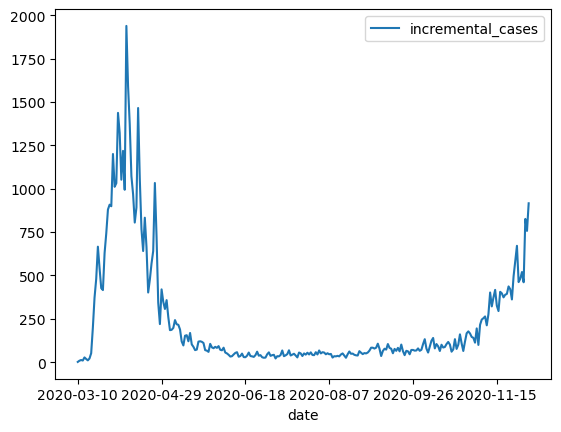

In [7]:
import pandas as pd
df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

# get selected counties
miami = df[df.entity == 'New York-Nassau']
miami.reset_index(inplace=True)
miami.plot(x='date', y='incremental_cases')

arimaModel = miami[['date', 'incremental_cases']]
train = arimaModel.head(int(0.85*len(arimaModel))+1)
test = arimaModel.tail(int(0.15*len(arimaModel)))

In [20]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error



# evaluate parameters
p_values = range(0,10,3)
q_values = range(0,10,3)
bigP = range(0,10,3)
bigQ = range(0,10,3)

vals = []
prev = 100000000000000000000000000
for p in p_values:
    for P in bigP:
        for q in q_values:
            for Q in bigQ:
                model=sm.tsa.statespace.SARIMAX(train['incremental_cases'],order=(p,1,q), seasonal_order=(P,1,Q,12))
                model.initialize_approximate_diffuse()
                model_fit = model.fit()
                # summary of fit model
                #print(model_fit.summary())
                # line plot of residuals
                residuals = pd.DataFrame(model_fit.resid)
                #residuals.plot()
                #plt.show()
                # density plot of residuals
                #residuals.plot(kind='kde')
                #plt.show()
                # summary stats of residuals
                #print(residuals.describe())
                forecast = model_fit.forecast(steps=40)

                predictTest = pd.DataFrame(forecast)
                predictTest.columns=['incremental_cases']
                #mseEval = predictTest.incremental_cases - test.incremental_cases
                r2 = mean_squared_error(test.incremental_cases, predictTest.incremental_cases)
                if r2 < prev:
                    prev = r2
                    best = [p, P, q, Q]
                    print(r2, 'for parameters', best)

print(best, prev)

92708.72500000047 for parameters [0, 0, 0, 0]


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py

88506.79499338145 for parameters [0, 0, 3, 0]


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py

80191.97522391914 for parameters [0, 0, 3, 9]


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


49616.55671361109 for parameters [0, 0, 6, 0]


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimizati

38377.75108550394 for parameters [0, 0, 9, 0]


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting 

36901.987383610955 for parameters [0, 3, 3, 3]


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimizatio

KeyboardInterrupt: 